# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

## Images

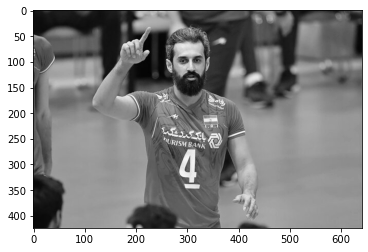

In [ ]:
marof = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/volleyball-4.jpg',0)
plt.imshow(marof,cmap='gray')

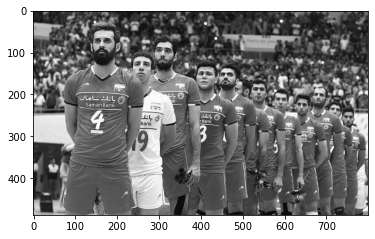

In [ ]:
team = cv2.imread('../DATA/volleyballteam.jpg',0)
plt.imshow(team,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
def detect_face(img):


    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img


In [ ]:
result = detect_face(marof)

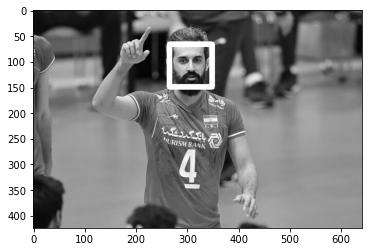

In [ ]:
plt.imshow(result,cmap='gray')

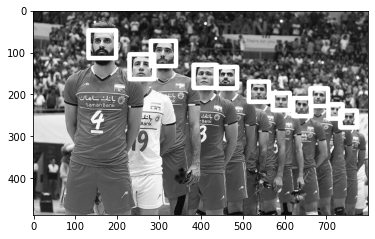

In [ ]:
result = detect_face(team)
plt.imshow(result,cmap='gray')

In [ ]:
def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img


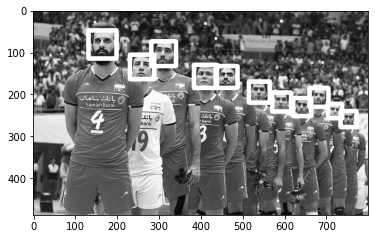

In [ ]:
# Doesn't detect the side face.
result = adj_detect_face(team)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [ ]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [ ]:
def detect_eyes(img):

    eye_img = img.copy()

    eyes = eye_cascade.detectMultiScale(eye_img)


    for (x,y,w,h) in eyes:
        cv2.rectangle(eye_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return eye_img


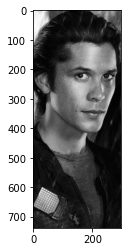

In [ ]:
pic = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/100.jpg',0)
plt.imshow(pic,cmap='gray')

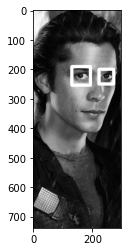

In [ ]:
result = detect_eyes(pic)
plt.imshow(result,cmap='gray')

## Conjunction with Video

In [1]:
import cv2
# import time
# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/computer vision/DATA/kid.mp4')

# FRAMES PER SECOND FOR VIDEO
# fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False:
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")


# While the video is opened
while cap.isOpened():




    # Read the video file.
    ret, frame = cap.read()

    # If we got frames, show them.
    if ret == True:

        frame = detect_face(frame)

        cv2.imshow('Video Face Detection', frame)



        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):

            break

    # Or automatically break this whole loop if the video is over.
    else:
        break

cap.release()
# Closes all the frames
cv2.destroyAllWindows()

Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook
